In [8]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt
import matplotlib as mpl
from importlib import reload
from vosk import Model
from Signal_Analysis.features.signal import get_HNR
from scipy import signal
from audiostretchy.stretch import stretch_audio


# tools work in progress
import tools

reload(tools)

plt.style.use("dark_background")
mpl.rcParams["lines.linewidth"] = 0.5
plt.close("all")

In [9]:
import os
from librosa import load

examples_dir = "example_speech_mp3/svenska"
filenames = os.listdir(examples_dir)
print(filenames)
audios = []
for f in filenames:
    y, Fs = load(os.path.join(examples_dir, f), sr=None)
    audios.append(y)

wavfile.write("wav_examples/svenska_combo.wav", Fs, tools.stitch_frames(audios))

['common_voice_sv-SE_38528961.mp3', 'common_voice_sv-SE_38528962.mp3', 'common_voice_sv-SE_38528964.mp3', 'common_voice_sv-SE_38528967.mp3', 'common_voice_sv-SE_38528968.mp3', 'common_voice_sv-SE_38543999.mp3', 'common_voice_sv-SE_38544000.mp3', 'common_voice_sv-SE_38544001.mp3', 'common_voice_sv-SE_38544002.mp3', 'common_voice_sv-SE_38544004.mp3', 'common_voice_sv-SE_38544013.mp3', 'common_voice_sv-SE_38544014.mp3', 'common_voice_sv-SE_38544015.mp3', 'common_voice_sv-SE_38544016.mp3', 'common_voice_sv-SE_38544017.mp3', 'common_voice_sv-SE_38568655.mp3', 'common_voice_sv-SE_38568656.mp3', 'common_voice_sv-SE_38568657.mp3', 'common_voice_sv-SE_38568658.mp3', 'common_voice_sv-SE_38568659.mp3', 'common_voice_sv-SE_38568660.mp3', 'common_voice_sv-SE_38568661.mp3', 'common_voice_sv-SE_38568662.mp3', 'common_voice_sv-SE_38568663.mp3', 'common_voice_sv-SE_38568664.mp3', 'common_voice_sv-SE_38568670.mp3', 'common_voice_sv-SE_38568671.mp3', 'common_voice_sv-SE_38568672.mp3', 'common_voice_sv-SE

## preprocess

In [10]:
audio_original_path = "wav_examples/svenska_combo.wav"
_ = tools.preprocess(audio_original_path)

preprocessing svenska_combo


## Speech recognition

In [11]:
audio_path = "audio_preproc/svenska_combo_pp.wav"
audio_path = "audio_preproc/180923214834-Y20UOTIE-text-000_pp.wav"

Fs, audio = wavfile.read(audio_path)
model_path = "models/vosk-model-small-sv-rhasspy-0.15/"
if "model" not in locals():
    model = Model(model_path)


i skymningen en mycket het dag i början av juli lämnade en ung man sin kammare som han hörde vid s grand steg ut på gatan och började långsamt och med samma obeslutsam går bort mot jobb men lyckligtvis slapp han möter värdinnan i kappan fanns kammare som låg alldeles in under den höga fem veckor aning byggnadens tak liknande snart ska jag köpa en bostad värdinnan som hyrde ut vind skutan och höll honom med middag som jag mål och städning bodde för sig i en våningen trappar trappa ner och när han skulle ut måste hem passera värdinnan kex ingång där döden nästan alltid sture


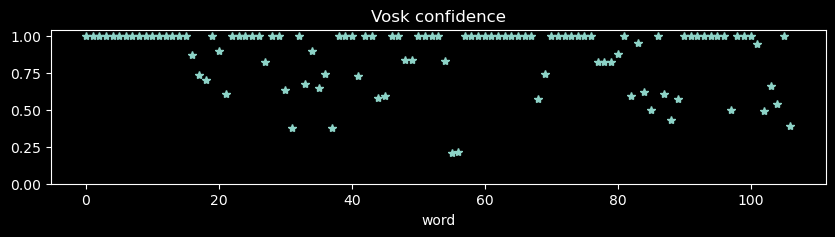

In [12]:
if "words" not in locals():
    words = tools.rec_vosk(audio_path, model, print_summary=True)

text = " ".join([w["word"] for w in words])


print(text)
plt.figure(figsize=(10, 2))
plt.plot([w["conf"] for w in words], "*")
plt.title("Vosk confidence")
plt.xlabel("word")
plt.ylim(bottom=0)
plt.show()

In [13]:
# get all vowels
for w in words:
    w["vowels"] = tools.checkVowels(w["word"], tools.VOWELS_SV)

for i, w in enumerate(words):
    print(i, w["word"], w["vowels"], str(w["conf"] * 100) + "%")

0 i ['i'] 100.0%
1 skymningen ['y', 'i', 'e'] 100.0%
2 en ['e'] 100.0%
3 mycket ['y', 'e'] 100.0%
4 het ['e'] 100.0%
5 dag ['a'] 100.0%
6 i ['i'] 100.0%
7 början ['ö', 'a'] 100.0%
8 av ['a'] 100.0%
9 juli ['u', 'i'] 100.0%
10 lämnade ['ä', 'a', 'e'] 100.0%
11 en ['e'] 100.0%
12 ung ['u'] 100.0%
13 man ['a'] 100.0%
14 sin ['i'] 100.0%
15 kammare ['a', 'a', 'e'] 100.0%
16 som ['o'] 87.0501%
17 han ['a'] 73.67869999999999%
18 hörde ['ö', 'e'] 70.1671%
19 vid ['i'] 100.0%
20 s [] 89.281%
21 grand ['a'] 60.827799999999996%
22 steg ['e'] 100.0%
23 ut ['u'] 100.0%
24 på ['å'] 100.0%
25 gatan ['a', 'a'] 100.0%
26 och ['o'] 100.0%
27 började ['ö', 'a', 'e'] 81.8951%
28 långsamt ['å', 'a'] 100.0%
29 och ['o'] 100.0%
30 med ['e'] 63.4952%
31 samma ['a', 'a'] 37.5446%
32 obeslutsam ['o', 'e', 'u', 'a'] 100.0%
33 går ['å'] 67.3912%
34 bort ['o'] 89.4242%
35 mot ['o'] 64.3671%
36 jobb ['o'] 73.9019%
37 men ['e'] 37.8958%
38 lyckligtvis ['y', 'i', 'i'] 100.0%
39 slapp ['a'] 100.0%
40 han ['a'] 100.0%

## test 1 word

en
['e']
['e']
frame length    : 882 samples
frame length    : 0.02 seconds
between frames  : 0.02 seconds
number of frames: 8


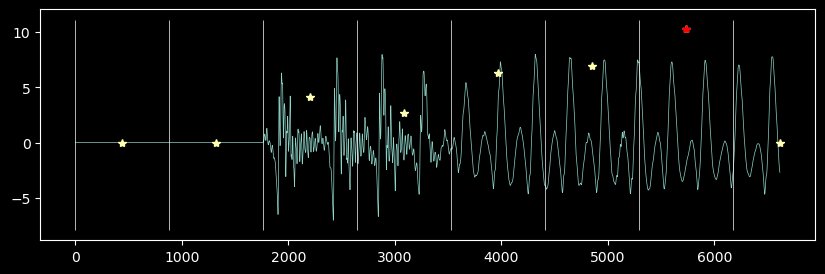

ValueError: need at least one array to concatenate

In [15]:
fl = int(0.02 * Fs)
k = 2
word = words[k]["word"]
print(word)
segments, vowels_per_segment = tools.segment_by_words(words, audio, Fs, tools.VOWELS_SV)
x = segments[k] / segments[k].max()
vowels = vowels_per_segment[k]

print(vowels)
print(words[k]["vowels"])

frames, f_start = tools.split_frames(x, fl, Fs, overlap=0, vol_thr=0.1, print_info=True)

peak_frames, hnr_frames = tools.HNR_short(frames, Fs, len(vowels))

plt.figure(figsize=(10, 3))
plt.plot(8 * np.concatenate(frames))
plt.plot(f_start + int(fl / 2), hnr_frames, "*")
plt.plot(f_start[peak_frames] + int(fl / 2), hnr_frames[peak_frames], "*r")
plt.vlines(f_start, *plt.ylim())

plt.show()

wavfile.write(f"output/1word{word}.wav", Fs, tools.stitch_frames(frames[12:16]))

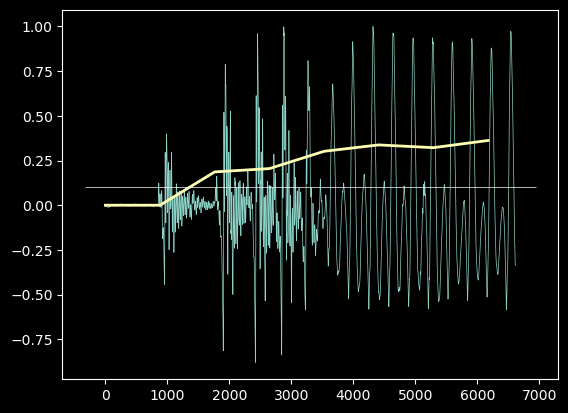

In [16]:
reload(tools)
plt.plot(x)
plt.plot(f_start, [tools.vol(f) for f in frames], linewidth=2)
plt.hlines(0.1, *plt.xlim())
plt.show()

## all words

In [17]:
reload(tools)
add_context = False

grouped_frames = {v: [] for v in tools.VOWELS_SV}
segments, vowels_per_segment = tools.segment_by_words(
    words, audio, Fs, tools.VOWELS_SV, signal_pad=0.02
)
for w, segment, vowels in zip(words, segments, vowels_per_segment):
    if w["conf"] >= 1:
        # print(w["word"], w["conf"])
        segment = np.concatenate((np.zeros(fl), segment, np.zeros(fl)))
        frames, f_start = tools.split_frames(segment, fl, Fs, vol_thr=0, overlap=0)
        peak_frames, hnr_frames = tools.HNR_short(frames, Fs, len(vowels))
        if len(peak_frames) == len(vowels):
            for i, v in enumerate(vowels):
                frame = frames[peak_frames[i]]
                if not tools.checkIfWhite(frame, wNoiseRatio=0.5):
                    if tools.vol_db(frame) > 30:
                        if np.sum(abs(frame) < 0.1 * max(frame)) / len(frame) < 0.5:
                            if add_context:
                                grouped_frames[v].append(
                                    tools.stitch_frames(
                                        frames[
                                            max(peak_frames[i] - 2, 0) : min(
                                                peak_frames[i] + 2, len(frames)
                                            )
                                        ]
                                    )
                                )
                            else:
                                grouped_frames[v].append(frames[peak_frames[i]])

In [20]:
vowels_in_text = {v: 0 for v in tools.VOWELS_SV}
for c in tools.checkVowels(text, tools.VOWELS_SV):
    vowels_in_text[c] += 1

print("found vowels:")
for v in grouped_frames.keys():
    print(
        "    ",
        v,
        len(grouped_frames[v]),
        str(round(100 * len(grouped_frames[v]) / vowels_in_text[v], 3)) + "%",
    )

print("total: vowels in text", sum([vowels_in_text[v] for v in vowels_in_text.keys()]))
for v in vowels_in_text.keys():
    print(vowels_in_text[v])

found vowels:
     i 18 78.261%
     ä 6 75.0%
     ö 3 33.333%
     y 4 80.0%
     u 7 70.0%
     a 32 65.306%
     o 10 55.556%
     å 3 37.5%
     e 22 59.459%
total: vowels in text 167
23
8
9
5
10
49
18
8
37


### Stitch audio out

In [37]:
audio_out = {}
for v in grouped_frames.keys():
    audio_out[v] = tools.stitch_frames(
        grouped_frames[v], fade_pow=0.0, padding=(Fs / 4) * add_context
    )

    if add_context:
        path = f"output/concatenated/concatenated_{v}_wcontext.wav"
    else:
        path = f"output/concatenated/concatenated_{v}.wav"

    wavfile.write(path, Fs, audio_out[v])
    # stretch_audio(path, path, 1)

## outlier removal

In [38]:
from sklearn import preprocessing, ensemble
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

grouped_frames_in = {v: [] for v in tools.VOWELS_SV}
inliers = {v: [] for v in tools.VOWELS_SV}

for v in grouped_frames.keys():
    print(v)
    frames = grouped_frames[v]
    mfcc = tools.get_mfcc(frames, Fs, n=20, normalize=True)

    X = np.array(mfcc)

    sc_X = preprocessing.StandardScaler()
    X = sc_X.fit_transform(X)
    print(X.shape)
    clf = ensemble.IsolationForest(random_state=0)
    clf.fit(X)

    inliers[v] = clf.predict(X) > 0

    grouped_frames_in[v] = np.array(frames)[inliers[v]]

    print(f"inliers {np.around(100*sum(inliers[v])/len(X))} %")

å


(155, 20)
inliers 90.0 %
ä
(141, 20)
inliers 92.0 %
y
(37, 20)
inliers 73.0 %
a
(661, 20)
inliers 93.0 %
o
(298, 20)
inliers 93.0 %
i
(320, 20)
inliers 92.0 %
ö
(114, 20)
inliers 89.0 %
e
(640, 20)
inliers 92.0 %
u
(138, 20)
inliers 91.0 %


In [39]:
audio_out_in = {}
for v in grouped_frames_in.keys():
    audio_out_in[v] = tools.stitch_frames(
        grouped_frames_in[v], fade_pow=0.0, padding=(Fs / 4) * add_context
    )

    path = f"output/concatenated/concatenated_{v}_inliers.wav"
    wavfile.write(path, Fs, audio_out_in[v])

## Look at output

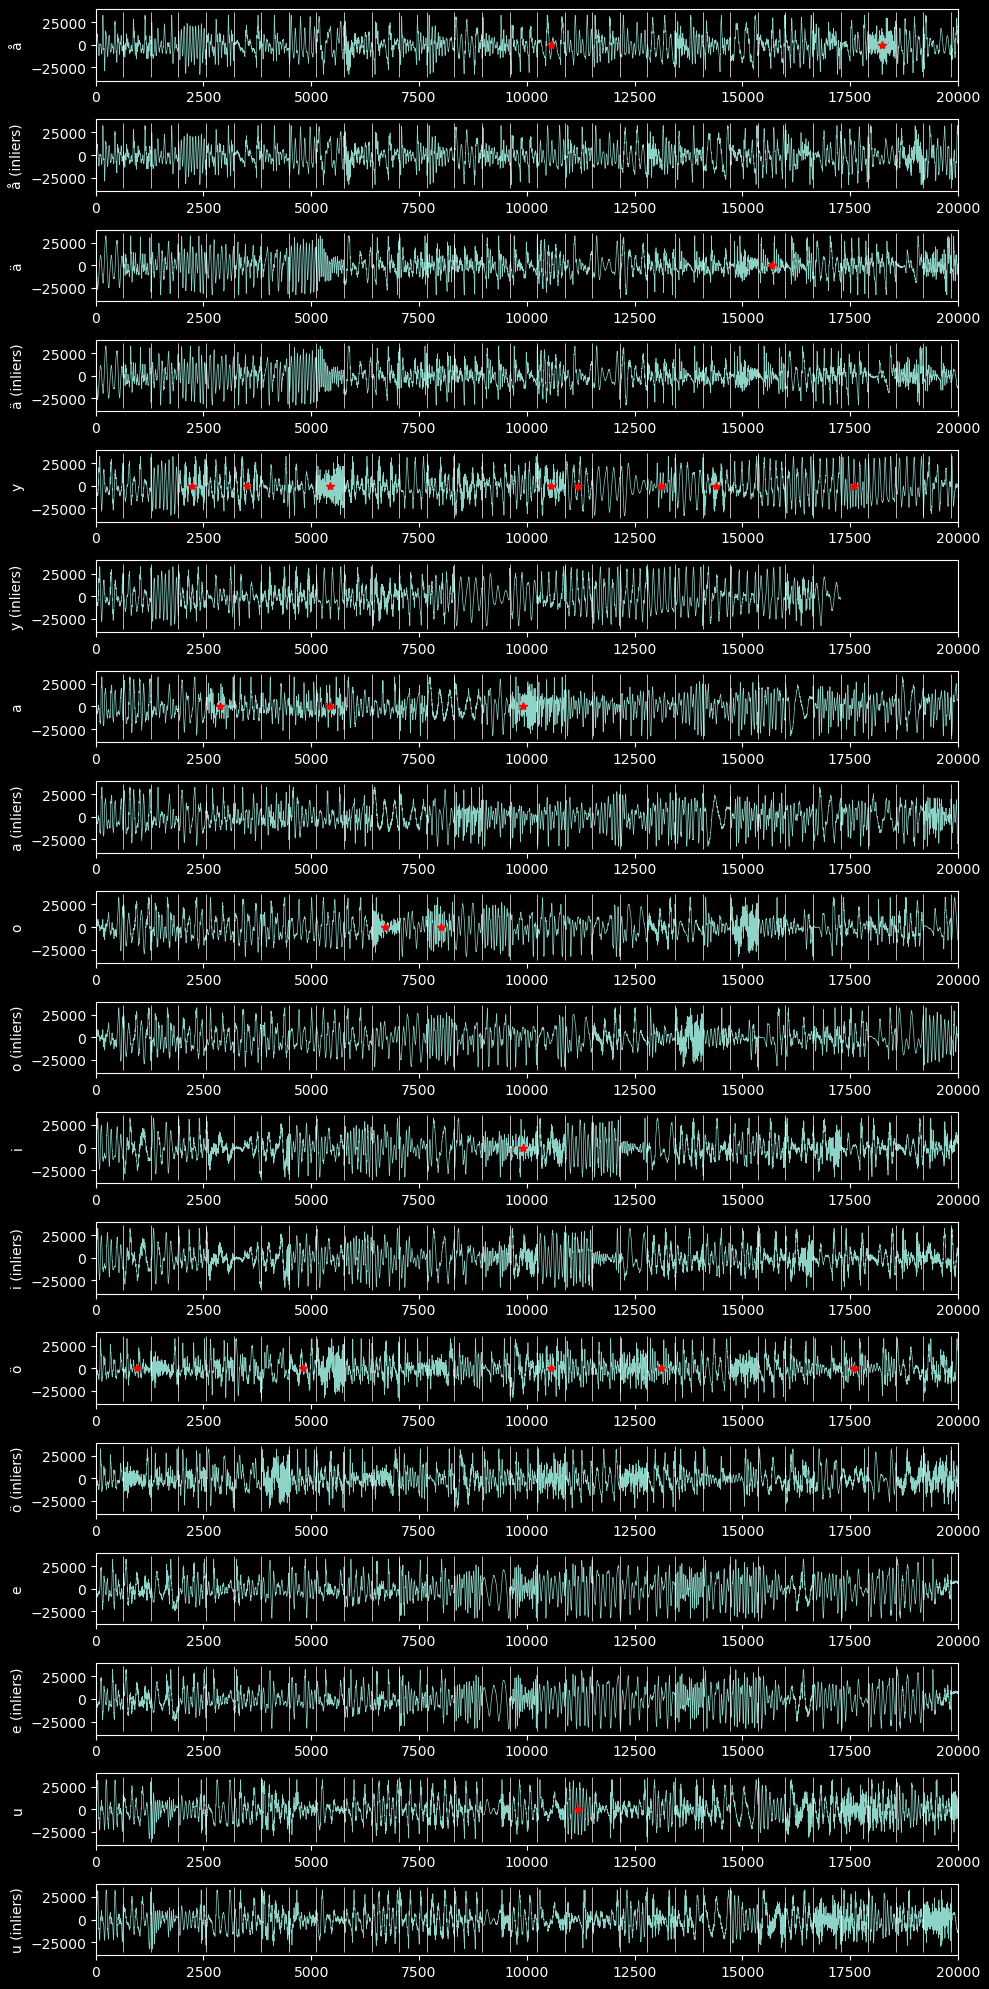

In [40]:
xmax = 20000
plt.figure(figsize=((10, 20)))
for i, v in enumerate(audio_out.keys()):
    # plot from grouped
    plt.subplot(2 * len(tools.VOWELS_SV), 1, 2 * i + 1)
    plt.plot(audio_out[v])
    tt = np.arange(0, len(audio_out[v]), fl) + fl / 2
    plt.plot(tt[np.logical_not(inliers[v])], 0 * tt[np.logical_not(inliers[v])], "*r")
    plt.xlim(0, xmax)
    plt.vlines(np.arange(0, len(audio_out[v]), fl), *plt.ylim())
    plt.ylabel(v)

    # plot from grouped inliers
    plt.subplot(2 * len(tools.VOWELS_SV), 1, 2 * i + 2)
    plt.plot(audio_out_in[v])
    plt.xlim(0, xmax)
    plt.vlines(np.arange(0, len(audio_out_in[v]), fl), *plt.ylim())
    plt.ylabel(f"{v} (inliers)")
plt.tight_layout()

vol 64.82254420589769
0 ratio 0.075


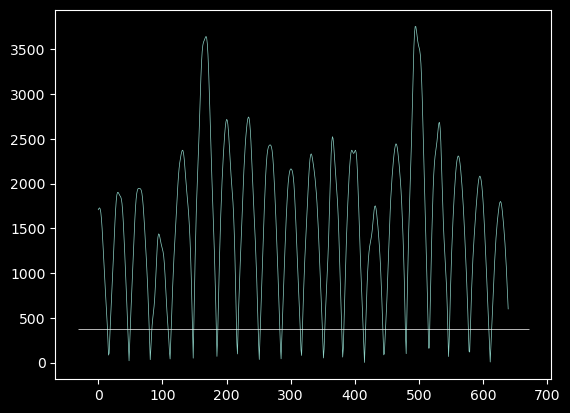

In [41]:
frame = grouped_frames["å"][3]
print("vol", tools.vol_db(frame))
print("0 ratio", np.sum(abs(frame) < 0.1 * max(frame)) / len(frame))

plt.figure()
plt.plot(abs(frame))
plt.hlines(0.1 * max(abs(frame)), *plt.xlim())
plt.show()